In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [2]:
def prepare_X_Y():
    filename = '../ressources/datasets/dataset_train.csv'

    data = pd.read_csv(filename, sep=",", index_col="Index")
    data = data.dropna()

    # similaire result (see Histogram)
    del data['Care of Magical Creatures']
    del data['Arithmancy']
    # data identic with defense ag. (see scatter_plot)
    del data['Astronomy']

    X = np.array((data.iloc[:,5:]))
    y = np.array(data.loc[:, "Hogwarts House"])
    return X, y

In [45]:
class LogisticRegression():
    def __init__(Logreg, learning_rate=0.01, n_iteration=100):
        Logreg.learning_rate = learning_rate
        Logreg.n_iter = n_iteration

    def _scaling(Logreg, X):
        '''
        avoid an overflow
        '''
        for i in range(len(X)):
            X[i] = (X[i] - X.mean()) / X.std()
        return X
    
    def _sigmoid_function(Logreg, x):
        value = 1 / (1 + np.exp(-x))
        return value
    
    def _hypothesis(Logreg, theta, X):
        return 1 / (1 + np.exp(-(np.dot(theta, X.T)))) - 0.0000001
    
    def _compute_cost(Logreg, W, X, Y):
        reg_strength = 10000
        # calculate hinge loss
        N = X.shape[0]
        distances = 1 - Y * (np.dot(X, W))
        distances[distances < 0] = 0  # equivalent to max(0, distance)
        hinge_loss = reg_strength * (np.sum(distances) / N)
        # calculate cost
        cost = 1 / 2 * np.dot(W, W) + hinge_loss
        return cost
    
    def _gradient_descent(Logreg, X, h, theta, y, m):
        '''
        theta = theta - alpha * sigma(h^i - y^i)(X^ij)
        '''
        gradient_value = np.dot(X.T, (h - y)) / m
        theta -= Logreg.learning_rate * gradient_value
        return theta

    def _sgd(Logreg, X, y, m):
        for i in np.unique(y):
            nth = 0
            prev_cost = float("inf")
            cost_threshold = 0.01
            X, y = shuffle(X, y)
            y_onevsall = np.where(y == i, 1, 0)
            theta = np.zeros(X.shape[1])

            for epoch in range(Logreg.n_iter):
                z = X.dot(theta)
                h = Logreg._sigmoid_function(z)
                theta = Logreg._gradient_descent(X, h, theta, y_onevsall, m)
                if epoch == 2 ** nth or epoch == Logreg.n_iter:
                    cost = Logreg._compute_cost(theta, X, y_onevsall)
                    print("{} -> Epoch is: {} and cost is: {}".format(i, epoch, cost))
                    # stoppage criterion
                    if abs(prev_cost - cost) < cost_threshold * prev_cost:
                        break
                    prev_cost = cost
                    nth += 1
            Logreg.theta.append((theta, i))
            Logreg.cost.append((cost, i))
    
    def fit(Logreg, X, y):
        print('Fitting the given dataset...')
        Logreg.theta = []
        Logreg.cost = []
        np.apply_along_axis(Logreg._scaling, 0, X)
        X = np.insert(X, 0, 1, axis=1)
        m = len(y)
        Logreg._sgd(X, y, m)
        return Logreg
    
    def predict(Logreg, X):
        X = np.insert(X, 0, 1, axis=1)
        X_predicted = [max((Logreg._sigmoid_function(i.dot(theta)), c) for theta, c in Logreg.theta)[1] for i in X]
        return X_predicted
    
    def score(Logreg, X, y):
        score = sum(Logreg.predict(X) == y) / len(y)
        return score
    
    def _plot_cost(Logreg, costh):
        for cost, c in costh:
            plt.plot(range(len(cost)), cost, 'r')
            plt.title('Convergence Graph of Cost Function of type-' + str(c) + ' vs All')
            plt.xlabel('Number of Iterations')
            plt.ylabel('Cost')
            plt.show()

In [46]:
X, y = prepare_X_Y()

In [47]:
logi = LogisticRegression(learning_rate=0.01,n_iteration=50000).fit(X, y)

Fitting the given dataset...
Gryffindor -> Epoch is: 1 and cost is: 9911.974849541619
Gryffindor -> Epoch is: 2 and cost is: 9866.875668643826
Hufflepuff -> Epoch is: 1 and cost is: 9975.583495513842
Hufflepuff -> Epoch is: 2 and cost is: 9960.217849738856
Ravenclaw -> Epoch is: 1 and cost is: 9920.608534204666
Ravenclaw -> Epoch is: 2 and cost is: 9879.090502721298
Slytherin -> Epoch is: 1 and cost is: 9979.60467285035
Slytherin -> Epoch is: 2 and cost is: 9966.409039875907


In [35]:
logi.score(X, y)

0.982414068745004

In [41]:
print(logi.cost)
print(logi.theta)

[(9866.875668643826, 'Gryffindor'), (9960.217849738856, 'Hufflepuff'), (9879.090502721298, 'Ravenclaw'), (9966.409039875907, 'Slytherin')]
[(array([-0.00852306, -0.01214538, -0.00751996, -0.00117861, -0.0016021 ,
       -0.00928677, -0.01934638, -0.01435889, -0.0145016 ,  0.0123075 ,
        0.01718317]), 'Gryffindor'), (array([-0.00493488,  0.00989619, -0.01324053,  0.00320241, -0.00799124,
       -0.01219212,  0.00392894, -0.00689165, -0.00823713,  0.00734699,
       -0.00729291]), 'Hufflepuff'), (array([-0.00643308,  0.00844557,  0.01347744,  0.00170262,  0.02528381,
       -0.0044657 ,  0.00212437, -0.00871798, -0.00301535,  0.01045921,
       -0.00535682]), 'Ravenclaw'), (array([-0.00939257, -0.01165857,  0.00903272, -0.01960981, -0.00065473,
       -0.01553781, -0.00117358, -0.01303927, -0.00250359,  0.0129378 ,
       -0.0116288 ]), 'Slytherin')]


In [37]:
print(logi.theta)
type(X)
# np.dot(X, logi.theta)

[(array([-0.00852306, -0.01214538, -0.00751996, -0.00117861, -0.0016021 ,
       -0.00928677, -0.01934638, -0.01435889, -0.0145016 ,  0.0123075 ,
        0.01718317]), 'Gryffindor'), (array([-0.00493488,  0.00989619, -0.01324053,  0.00320241, -0.00799124,
       -0.01219212,  0.00392894, -0.00689165, -0.00823713,  0.00734699,
       -0.00729291]), 'Hufflepuff'), (array([-0.00643308,  0.00844557,  0.01347744,  0.00170262,  0.02528381,
       -0.0044657 ,  0.00212437, -0.00871798, -0.00301535,  0.01045921,
       -0.00535682]), 'Ravenclaw'), (array([-0.00939257, -0.01165857,  0.00903272, -0.01960981, -0.00065473,
       -0.01553781, -0.00117358, -0.01303927, -0.00250359,  0.0129378 ,
       -0.0116288 ]), 'Slytherin')]


numpy.ndarray

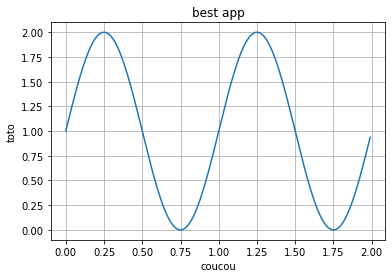

In [53]:
import matplotlib
import matplotlib.pyplot as plt 

logi.cost

t = np.arange(0.0, 2.0, 0.01)
x2 = 1 + np.sin(2 * np.pi * t)

fix, ax = plt.subplots()
ax.plot(t, x2)

ax.set(xlabel='coucou', ylabel='toto', title='best app')
ax.grid()

plt.show()